## UPDATED: Flood Impacts on Vulnerable Communities in San Diego County

**Part 1: Stephanie Andrade**

*In this notebook we will be analyzing data relevant to flood infrastructure and Census Data in San Diego County.*

**Are low income communities of color in San Diego County disproportionately affected by flood disasters?**


**First, we want to understand who lives in San Diego County? What is the income distribution? This gives us light to the types of resources available in the communities and tracts. So, I will go ahaead an investigate race and median income in the first part of our data analysis.**

*We import our essential data libraries and Census datasets.*

In [1]:
import urllib.request, json 

import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

In [2]:
Income = gpd.read_file('data/Median Income.geojson')

In [3]:
Race = gpd.read_file('data/Race.geojson')

**Quick Census data check.**

In [4]:
Income.shape

(628, 5)

In [5]:
Race.shape

(628, 45)

In [6]:
Income.head()

geoid                              name  B19013001  \
0  14000US06073000100     Census Tract 1, San Diego, CA   138879.0   
1  14000US06073000201  Census Tract 2.01, San Diego, CA    88125.0   
2  14000US06073000202  Census Tract 2.02, San Diego, CA    76658.0   
3  14000US06073000300     Census Tract 3, San Diego, CA    68679.0   
4  14000US06073000400     Census Tract 4, San Diego, CA    70267.0   

   B19013001, Error                                           geometry  
0           16299.0  MULTIPOLYGON (((-117.19490 32.75278, -117.1947...  
1           13949.0  MULTIPOLYGON (((-117.17887 32.75765, -117.1779...  
2           18367.0  MULTIPOLYGON (((-117.18404 32.74571, -117.1838...  
3           11872.0  MULTIPOLYGON (((-117.16864 32.74897, -117.1684...  
4           16953.0  MULTIPOLYGON (((-117.17087 32.75865, -117.1701...

In [7]:
Race.head()

geoid                              name  B03002001  \
0  14000US06073000100     Census Tract 1, San Diego, CA     3093.0   
1  14000US06073000201  Census Tract 2.01, San Diego, CA     1891.0   
2  14000US06073000202  Census Tract 2.02, San Diego, CA     4542.0   
3  14000US06073000300     Census Tract 3, San Diego, CA     5239.0   
4  14000US06073000400     Census Tract 4, San Diego, CA     3801.0   

   B03002001, Error  B03002002  B03002002, Error  B03002003  B03002003, Error  \
0             364.0     2604.0             223.0     2389.0             216.0   
1             158.0     1751.0             164.0     1569.0             165.0   
2             401.0     3926.0             423.0     3390.0             456.0   
3             415.0     4368.0             425.0     3820.0             445.0   
4             474.0     2917.0             385.0     2148.0             381.0   

   B03002004  B03002004, Error  ...  B03002017, Error  B03002018  \
0        0.0              12.0  ...              21.0       39.0   
1       10.0              17.0  ...              12.0       35.0   
2        4.0               8.0  ...              12.0       68.0   
3      266.0             171.0  ...              17.0       81.0   
4      228.0             146.0  ...              12.0      171.0   

   B03002018, Error  B03002019  B03002019, Error  B03002020  B03002020, Error  \
0              31.0        8.0              14.0        0.0              12.0   
1              32.0       15.0              25.0        0.0              12.0   
2              50.0       43.0              54.0       16.0              28.0   
3              67.0       66.0              62.0       22.0              34.0   
4             127.0       44.0              46.0        0.0              12.0   

   B03002021  B03002021, Error  \
0        8.0              14.0   
1       15.0              25.0   
2       27.0              44.0   
3       44.0              52.0   
4       44.0              46.0   

                                            geometry  
0  MULTIPOLYGON (((-117.19490 32.75278, -117.1947...  
1  MULTIPOLYGON (((-117.17887 32.75765, -117.1779...  
2  MULTIPOLYGON (((-117.18404 32.74571, -117.1838...  
3  MULTIPOLYGON (((-117.16864 32.74897, -117.1684...  
4  MULTIPOLYGON (((-117.17087 32.75865, -117.1701...  

[5 rows x 45 columns]

**Now we have a better idea of our general datasets. There are a few columns that need some clean up.**

**Both of our datasets are in the same region!**

<AxesSubplot:>

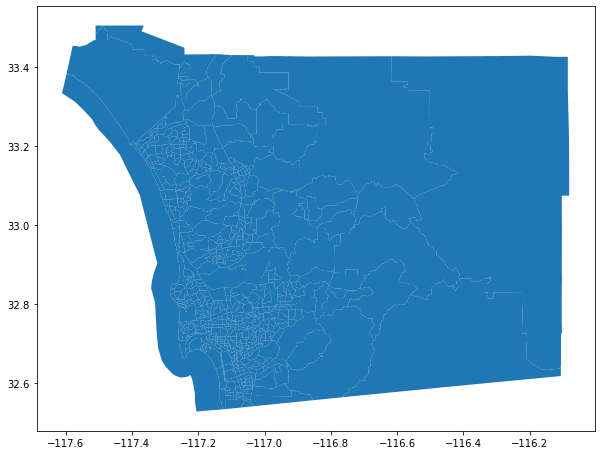

In [8]:
Race.plot(figsize=(10,10))

<AxesSubplot:>

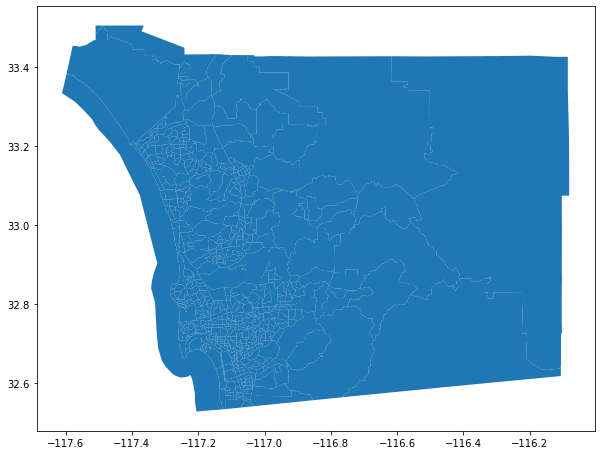

In [9]:
Income.plot(figsize=(10,10))

In [10]:
Income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             628 non-null    object  
 1   name              628 non-null    object  
 2   B19013001         621 non-null    float64 
 3   B19013001, Error  621 non-null    float64 
 4   geometry          628 non-null    geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 24.7+ KB


In [11]:
Race.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             628 non-null    object  
 1   name              628 non-null    object  
 2   B03002001         628 non-null    float64 
 3   B03002001, Error  628 non-null    float64 
 4   B03002002         628 non-null    float64 
 5   B03002002, Error  628 non-null    float64 
 6   B03002003         628 non-null    float64 
 7   B03002003, Error  628 non-null    float64 
 8   B03002004         628 non-null    float64 
 9   B03002004, Error  628 non-null    float64 
 10  B03002005         628 non-null    float64 
 11  B03002005, Error  628 non-null    float64 
 12  B03002006         628 non-null    float64 
 13  B03002006, Error  628 non-null    float64 
 14  B03002007         628 non-null    float64 
 15  B03002007, Error  628 non-null    float64 
 16  B03002008         

In [12]:
Income.geoid.head()

0    14000US06073000100
1    14000US06073000201
2    14000US06073000202
3    14000US06073000300
4    14000US06073000400
Name: geoid, dtype: object

In [13]:
Race.geoid.head()

0    14000US06073000100
1    14000US06073000201
2    14000US06073000202
3    14000US06073000300
4    14000US06073000400
Name: geoid, dtype: object

**Now we want clean up and delete all that unwanted data.**

In [14]:
list(Income)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

In [15]:
columns_to_keep_income = ['geoid','name','B19013001', 'geometry']

In [16]:
Income = Income[columns_to_keep_income]

In [17]:
Income.head()

geoid                              name  B19013001  \
0  14000US06073000100     Census Tract 1, San Diego, CA   138879.0   
1  14000US06073000201  Census Tract 2.01, San Diego, CA    88125.0   
2  14000US06073000202  Census Tract 2.02, San Diego, CA    76658.0   
3  14000US06073000300     Census Tract 3, San Diego, CA    68679.0   
4  14000US06073000400     Census Tract 4, San Diego, CA    70267.0   

                                            geometry  
0  MULTIPOLYGON (((-117.19490 32.75278, -117.1947...  
1  MULTIPOLYGON (((-117.17887 32.75765, -117.1779...  
2  MULTIPOLYGON (((-117.18404 32.74571, -117.1838...  
3  MULTIPOLYGON (((-117.16864 32.74897, -117.1684...  
4  MULTIPOLYGON (((-117.17087 32.75865, -117.1701...

In [18]:
list(Race)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [19]:
columns_to_keep_race = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [20]:
Race = Race[columns_to_keep_race]

In [21]:
Race.head()

geoid                              name  B03002001  B03002002  \
0  14000US06073000100     Census Tract 1, San Diego, CA     3093.0     2604.0   
1  14000US06073000201  Census Tract 2.01, San Diego, CA     1891.0     1751.0   
2  14000US06073000202  Census Tract 2.02, San Diego, CA     4542.0     3926.0   
3  14000US06073000300     Census Tract 3, San Diego, CA     5239.0     4368.0   
4  14000US06073000400     Census Tract 4, San Diego, CA     3801.0     2917.0   

   B03002003  B03002004  B03002005  B03002006  B03002007  B03002008  \
0     2389.0        0.0        0.0      112.0        0.0        0.0   
1     1569.0       10.0       11.0       75.0        0.0        0.0   
2     3390.0        4.0        0.0      379.0        3.0        0.0   
3     3820.0      266.0        0.0      146.0        7.0        0.0   
4     2148.0      228.0        0.0      430.0        0.0       18.0   

   B03002009  B03002012                                           geometry  
0      103.0      489.0  MULTIPOLYGON (((-117.19490 32.75278, -117.1947...  
1       86.0      140.0  MULTIPOLYGON (((-117.17887 32.75765, -117.1779...  
2      150.0      616.0  MULTIPOLYGON (((-117.18404 32.74571, -117.1838...  
3      129.0      871.0  MULTIPOLYGON (((-117.16864 32.74897, -117.1684...  
4       93.0      884.0  MULTIPOLYGON (((-117.17087 32.75865, -117.1701...

**Renaming Columns**

In [22]:
list(Income)

['geoid', 'name', 'B19013001', 'geometry']

In [23]:
Income.columns = ['geoid', 'name', 'Median Income', 'geometry']

In [24]:
Income.head()

geoid                              name  Median Income  \
0  14000US06073000100     Census Tract 1, San Diego, CA       138879.0   
1  14000US06073000201  Census Tract 2.01, San Diego, CA        88125.0   
2  14000US06073000202  Census Tract 2.02, San Diego, CA        76658.0   
3  14000US06073000300     Census Tract 3, San Diego, CA        68679.0   
4  14000US06073000400     Census Tract 4, San Diego, CA        70267.0   

                                            geometry  
0  MULTIPOLYGON (((-117.19490 32.75278, -117.1947...  
1  MULTIPOLYGON (((-117.17887 32.75765, -117.1779...  
2  MULTIPOLYGON (((-117.18404 32.74571, -117.1838...  
3  MULTIPOLYGON (((-117.16864 32.74897, -117.1684...  
4  MULTIPOLYGON (((-117.17087 32.75865, -117.1701...

In [25]:
list(Race)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [26]:
Race.columns = ['geoid', 'name', 
                  'Total',
                  'Non Hispanic or Latino',
                  'White',
                  'Black',
                  'American Indian and Alaska Native',
                  'Asian',
                  'Native Hawaiian and Other Pacific Islander',
                  'Non Hispanic Some other race',
                  'Non Hispanic Two or more races',
                  'Hispanic',
                  'geometry']
                  

In [27]:
Race.head()

geoid                              name   Total  \
0  14000US06073000100     Census Tract 1, San Diego, CA  3093.0   
1  14000US06073000201  Census Tract 2.01, San Diego, CA  1891.0   
2  14000US06073000202  Census Tract 2.02, San Diego, CA  4542.0   
3  14000US06073000300     Census Tract 3, San Diego, CA  5239.0   
4  14000US06073000400     Census Tract 4, San Diego, CA  3801.0   

   Non Hispanic or Latino   White  Black  American Indian and Alaska Native  \
0                  2604.0  2389.0    0.0                                0.0   
1                  1751.0  1569.0   10.0                               11.0   
2                  3926.0  3390.0    4.0                                0.0   
3                  4368.0  3820.0  266.0                                0.0   
4                  2917.0  2148.0  228.0                                0.0   

   Asian  Native Hawaiian and Other Pacific Islander  \
0  112.0                                         0.0   
1   75.0                                         0.0   
2  379.0                                         3.0   
3  146.0                                         7.0   
4  430.0                                         0.0   

   Non Hispanic Some other race  Non Hispanic Two or more races  Hispanic  \
0                           0.0                           103.0     489.0   
1                           0.0                            86.0     140.0   
2                           0.0                           150.0     616.0   
3                           0.0                           129.0     871.0   
4                          18.0                            93.0     884.0   

                                            geometry  
0  MULTIPOLYGON (((-117.19490 32.75278, -117.1947...  
1  MULTIPOLYGON (((-117.17887 32.75765, -117.1779...  
2  MULTIPOLYGON (((-117.18404 32.74571, -117.1838...  
3  MULTIPOLYGON (((-117.16864 32.74897, -117.1684...  
4  MULTIPOLYGON (((-117.17087 32.75865, -117.1701...

In [28]:
Race[Race['Total']==0]

geoid                               name  Total  \
238  14000US06073009902  Census Tract 99.02, San Diego, CA    0.0   
627  14000US06073990100   Census Tract 9901, San Diego, CA    0.0   

     Non Hispanic or Latino  White  Black  American Indian and Alaska Native  \
238                     0.0    0.0    0.0                                0.0   
627                     0.0    0.0    0.0                                0.0   

     Asian  Native Hawaiian and Other Pacific Islander  \
238    0.0                                         0.0   
627    0.0                                         0.0   

     Non Hispanic Some other race  Non Hispanic Two or more races  Hispanic  \
238                           0.0                             0.0       0.0   
627                           0.0                             0.0       0.0   

                                              geometry  
238  MULTIPOLYGON (((-117.23991 32.69564, -117.2398...  
627  MULTIPOLYGON (((-117.61104 33.33413, -117.6086...

In [29]:
Race_no_pop = Race[Race['Total']==0]

In [30]:
print('There are ' + str(len(Race_no_pop)) + ' census tracts with no people in them')

There are 2 census tracts with no people in them


In [31]:
Race_no_pop[['geoid','Total']]

geoid  Total
238  14000US06073009902    0.0
627  14000US06073990100    0.0

## Median Income Analysis

In [32]:
random_tract = Income.sample()
random_tract

geoid                                name  Median Income  \
614  14000US06073021204  Census Tract 212.04, San Diego, CA       108913.0   

                                              geometry  
614  MULTIPOLYGON (((-116.82885 32.79289, -116.8287...

<AxesSubplot:ylabel='Frequency'>

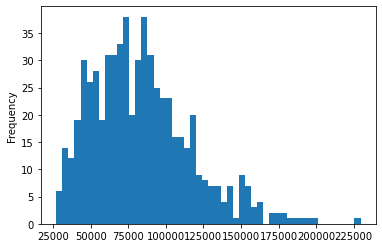

In [33]:
Income['Median Income'].plot.hist(bins=50)

In [34]:
Income['Median Income'].median()

79953.0

**Let us make this a little more visually appealing.**

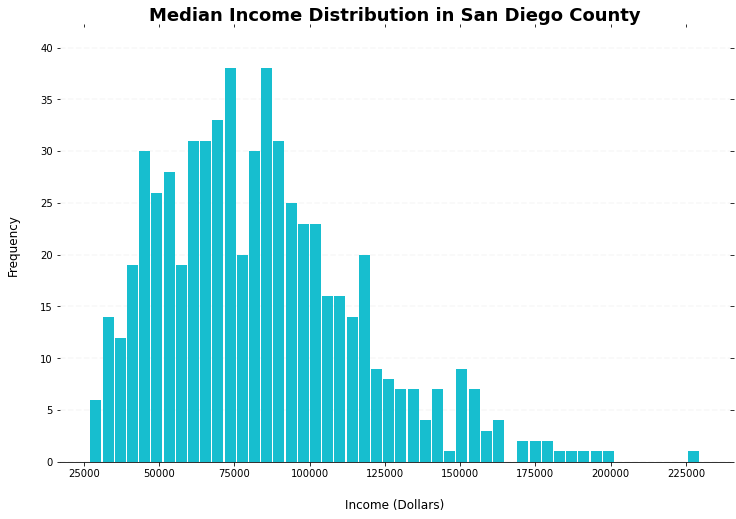

In [35]:
ax = Income.hist(column='Median Income', bins=50, grid=False, figsize=(12,8), color='#17becf', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:
    
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Median Income Distribution in San Diego County", weight='bold', size=18)

    # Set x-axis label
    x.set_xlabel("Income (Dollars)", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, size=12)

In [36]:
Income_sorted = Income.sort_values(by='Median Income',ascending = False)

In [37]:
Income_sorted[['geoid','Median Income']].head(10)

geoid  Median Income
146  14000US06073008311       229583.0
151  14000US06073008328       199613.0
148  14000US06073008313       194643.0
455  14000US06073017109       192028.0
424  14000US06073017029       186116.0
458  14000US06073017303       182292.0
453  14000US06073017107       180417.0
621  14000US06073021500       177863.0
155  14000US06073008333       175227.0
154  14000US06073008331       173207.0

**The top earning counties in San Diego County.**

<AxesSubplot:>

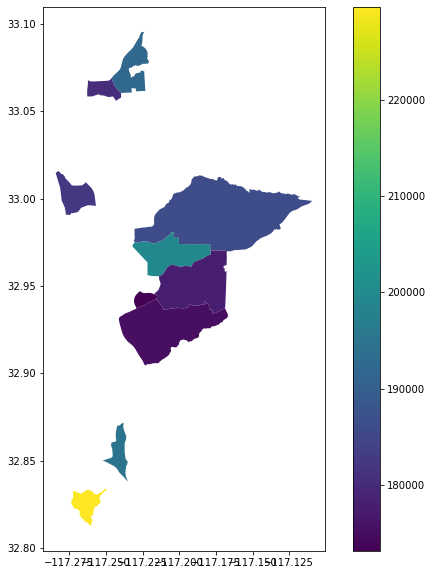

In [38]:
Income_sorted.head(10).plot(figsize=(10,10),column='Median Income',legend=True)

<AxesSubplot:>

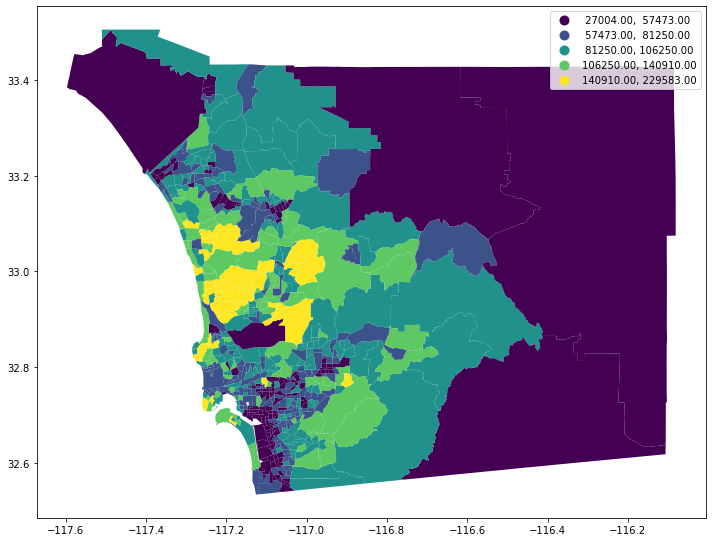

In [39]:
Income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

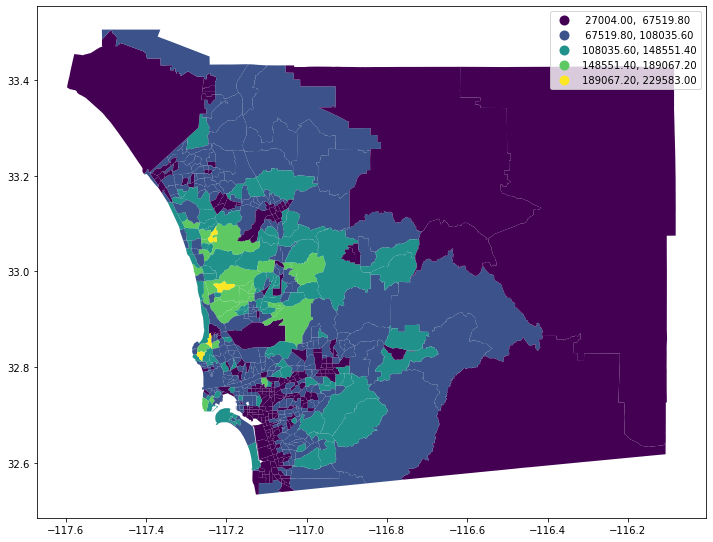

In [40]:
Income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot:>

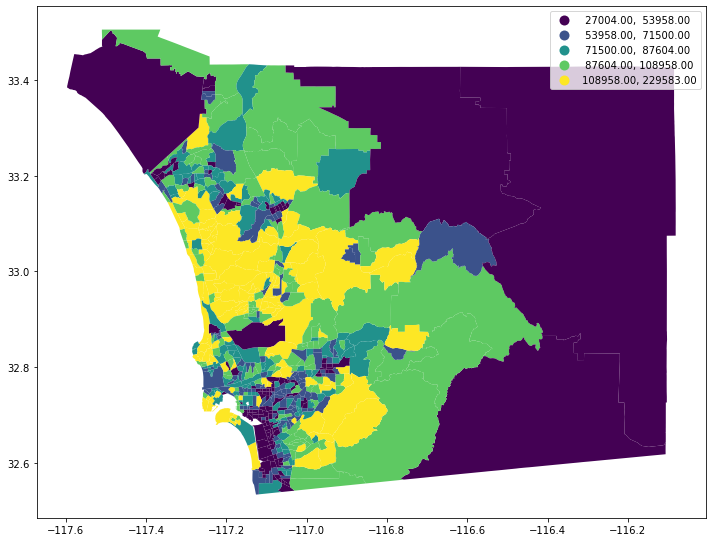

In [41]:
Income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='quantiles')

<AxesSubplot:>

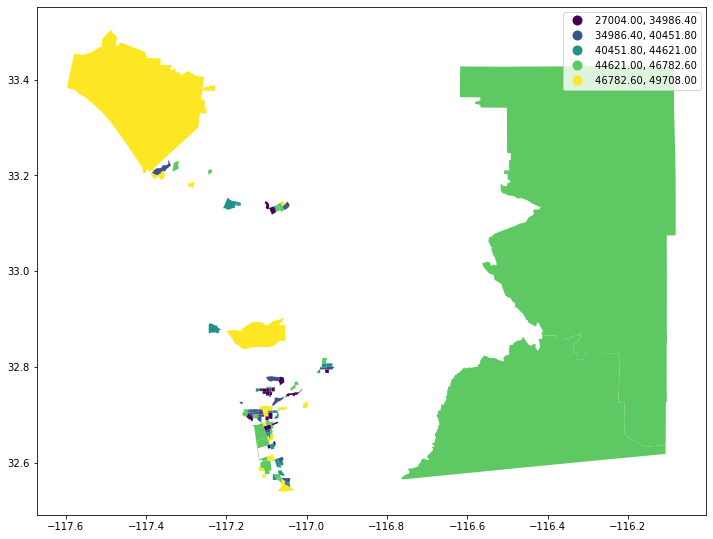

In [42]:
Income[Income['Median Income'] < 50000].plot(figsize=(12,10),column='Median Income',
                 legend=True, 
                 scheme='quantiles')

In [43]:
Income_web_mercator = Income.to_crs(epsg=3857)

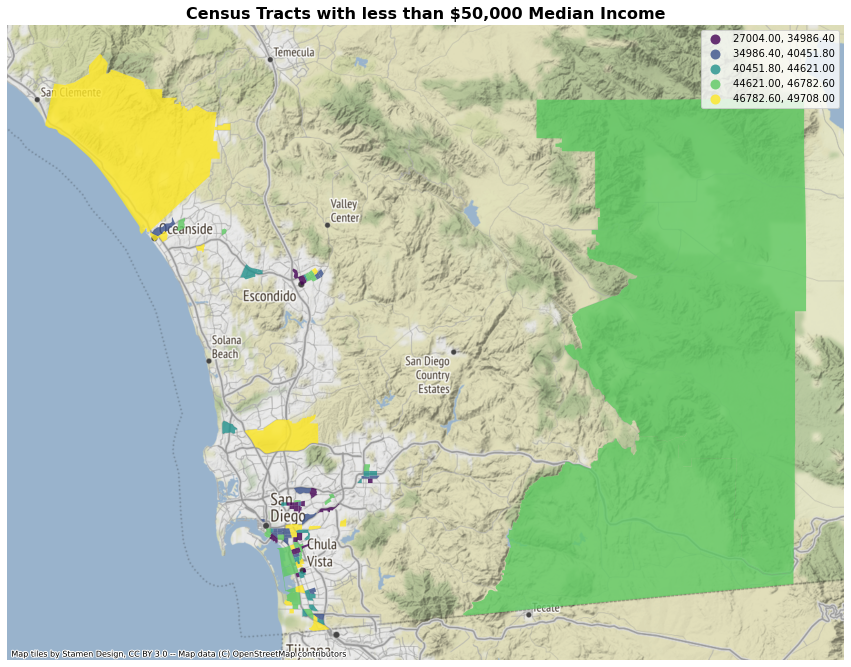

In [44]:
fig, ax = plt.subplots(figsize=(15, 15))

Income_web_mercator[Income_web_mercator['Median Income'] < 50000].plot(ax=ax, alpha=0.8, column='Median Income',
                 legend=True, 
                 scheme='quantiles')

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with less than $50,000 Median Income',fontsize=16, weight='bold')

# add a basemap
ctx.add_basemap(ax)

## Race Analysis

In [45]:
random_tract2 = Race.sample()
random_tract2

geoid                                name   Total  \
284  14000US06073012401  Census Tract 124.01, San Diego, CA  3539.0   

     Non Hispanic or Latino  White  Black  American Indian and Alaska Native  \
284                  1118.0  624.0  115.0                                0.0   

     Asian  Native Hawaiian and Other Pacific Islander  \
284  220.0                                         0.0   

     Non Hispanic Some other race  Non Hispanic Two or more races  Hispanic  \
284                           0.0                           159.0    2421.0   

                                              geometry  
284  MULTIPOLYGON (((-117.09856 32.65434, -117.0982...

#### Race data includes a lot more columns so we need to make sure our clean up did not mess up our entire dataset.

In [46]:
random_tract2.iloc[0]['Total']

3539.0

In [47]:
print('Total population: ' + str(random_tract2.iloc[0]['Total']))

Total population: 3539.0


In [48]:
print('Non Hispanic or Latino + Hispanic: ' + str(random_tract2.iloc[0]['Non Hispanic or Latino'] + random_tract2.iloc[0]['Hispanic']))

Non Hispanic or Latino + Hispanic: 3539.0


In [49]:
Race.head()

geoid                              name   Total  \
0  14000US06073000100     Census Tract 1, San Diego, CA  3093.0   
1  14000US06073000201  Census Tract 2.01, San Diego, CA  1891.0   
2  14000US06073000202  Census Tract 2.02, San Diego, CA  4542.0   
3  14000US06073000300     Census Tract 3, San Diego, CA  5239.0   
4  14000US06073000400     Census Tract 4, San Diego, CA  3801.0   

   Non Hispanic or Latino   White  Black  American Indian and Alaska Native  \
0                  2604.0  2389.0    0.0                                0.0   
1                  1751.0  1569.0   10.0                               11.0   
2                  3926.0  3390.0    4.0                                0.0   
3                  4368.0  3820.0  266.0                                0.0   
4                  2917.0  2148.0  228.0                                0.0   

   Asian  Native Hawaiian and Other Pacific Islander  \
0  112.0                                         0.0   
1   75.0                                         0.0   
2  379.0                                         3.0   
3  146.0                                         7.0   
4  430.0                                         0.0   

   Non Hispanic Some other race  Non Hispanic Two or more races  Hispanic  \
0                           0.0                           103.0     489.0   
1                           0.0                            86.0     140.0   
2                           0.0                           150.0     616.0   
3                           0.0                           129.0     871.0   
4                          18.0                            93.0     884.0   

                                            geometry  
0  MULTIPOLYGON (((-117.19490 32.75278, -117.1947...  
1  MULTIPOLYGON (((-117.17887 32.75765, -117.1779...  
2  MULTIPOLYGON (((-117.18404 32.74571, -117.1838...  
3  MULTIPOLYGON (((-117.16864 32.74897, -117.1684...  
4  MULTIPOLYGON (((-117.17087 32.75865, -117.1701...

In [50]:
print(random_tract2.iloc[0]['White'] + 
      random_tract2.iloc[0]['Black'] + 
      random_tract2.iloc[0]['American Indian and Alaska Native'] + 
      random_tract2.iloc[0]['Asian'] + 
      random_tract2.iloc[0]['Native Hawaiian and Other Pacific Islander'] + 
      random_tract2.iloc[0]['Non Hispanic Some other race'] + 
      random_tract2.iloc[0]['Non Hispanic Two or more races'] + 
      random_tract2.iloc[0]['Hispanic'])

3539.0


In [51]:
Race['Total'].head()

0    3093.0
1    1891.0
2    4542.0
3    5239.0
4    3801.0
Name: Total, dtype: float64

In [52]:
Race['Total'].mean()

5280.37101910828

In [53]:
Race['Total'].median()

4880.0

In [54]:
Race['Total'].describe()

count      628.000000
mean      5280.371019
std       2981.074505
min          0.000000
25%       3704.750000
50%       4880.000000
75%       6258.250000
max      38754.000000
Name: Total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

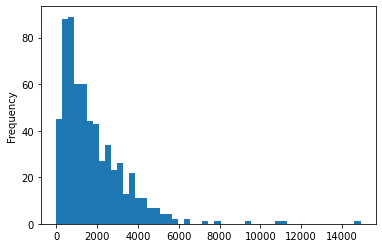

In [55]:
Race['Hispanic'].plot.hist(bins=50)

#### Let's create a cleaner histogram with x and y axis labels.

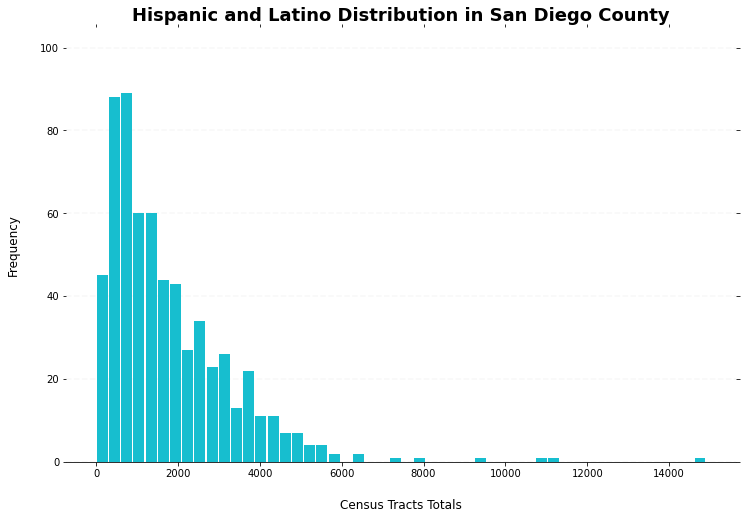

In [56]:
ax = Race.hist(column='Hispanic', bins=50, grid=False, figsize=(12,8), color='#17becf', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:
    
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Hispanic and Latino Distribution in San Diego County", weight='bold', size=18)

    # Set x-axis label
    x.set_xlabel("Census Tracts Totals", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, size=12)

In [57]:
list(Race)

['geoid',
 'name',
 'Total',
 'Non Hispanic or Latino',
 'White',
 'Black',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [58]:
Race['Percent Non Hispanic or Latino'] = Race['Non Hispanic or Latino']/Race['Total']*100

Race['Percent Hispanic'] = Race['Hispanic']/Race['Total']*100

Race['Percent White'] = Race['White']/Race['Total']*100

Race['Percent Black'] = Race['Black']/Race['Total']*100

Race['Percent American Indian and Alaska Native'] = Race['American Indian and Alaska Native']/Race['Total']*100

Race['Percent Native Hawaiian and Other Pacific Islander'] = Race['Native Hawaiian and Other Pacific Islander']/Race['Total']*100

Race['Percent Non Hispanic Some other race'] = Race['Non Hispanic Some other race']/Race['Total']*100

Race['Percent Non Hispanic Two or more races'] = Race['Non Hispanic Two or more races']/Race['Total']*100

In [59]:
Race.head(5)

geoid                              name   Total  \
0  14000US06073000100     Census Tract 1, San Diego, CA  3093.0   
1  14000US06073000201  Census Tract 2.01, San Diego, CA  1891.0   
2  14000US06073000202  Census Tract 2.02, San Diego, CA  4542.0   
3  14000US06073000300     Census Tract 3, San Diego, CA  5239.0   
4  14000US06073000400     Census Tract 4, San Diego, CA  3801.0   

   Non Hispanic or Latino   White  Black  American Indian and Alaska Native  \
0                  2604.0  2389.0    0.0                                0.0   
1                  1751.0  1569.0   10.0                               11.0   
2                  3926.0  3390.0    4.0                                0.0   
3                  4368.0  3820.0  266.0                                0.0   
4                  2917.0  2148.0  228.0                                0.0   

   Asian  Native Hawaiian and Other Pacific Islander  \
0  112.0                                         0.0   
1   75.0                                         0.0   
2  379.0                                         3.0   
3  146.0                                         7.0   
4  430.0                                         0.0   

   Non Hispanic Some other race  ...  Hispanic  \
0                           0.0  ...     489.0   
1                           0.0  ...     140.0   
2                           0.0  ...     616.0   
3                           0.0  ...     871.0   
4                          18.0  ...     884.0   

                                            geometry  \
0  MULTIPOLYGON (((-117.19490 32.75278, -117.1947...   
1  MULTIPOLYGON (((-117.17887 32.75765, -117.1779...   
2  MULTIPOLYGON (((-117.18404 32.74571, -117.1838...   
3  MULTIPOLYGON (((-117.16864 32.74897, -117.1684...   
4  MULTIPOLYGON (((-117.17087 32.75865, -117.1701...   

  Percent Non Hispanic or Latino  Percent Hispanic  Percent White  \
0                      84.190107         15.809893      77.238927   
1                      92.596510          7.403490      82.971973   
2                      86.437693         13.562307      74.636724   
3                      83.374690         16.625310      72.914678   
4                      76.742962         23.257038      56.511444   

   Percent Black  Percent American Indian and Alaska Native  \
0       0.000000                                   0.000000   
1       0.528821                                   0.581703   
2       0.088067                                   0.000000   
3       5.077305                                   0.000000   
4       5.998421                                   0.000000   

   Percent Native Hawaiian and Other Pacific Islander  \
0                                           0.000000    
1                                           0.000000    
2                                           0.066050    
3                                           0.133613    
4                                           0.000000    

   Percent Non Hispanic Some other race  \
0                               0.00000   
1                               0.00000   
2                               0.00000   
3                               0.00000   
4                               0.47356   

   Percent Non Hispanic Two or more races  
0                                3.330100  
1                                4.547858  
2                                3.302510  
3                                2.462302  
4                                2.446725  

[5 rows x 21 columns]

<AxesSubplot:>

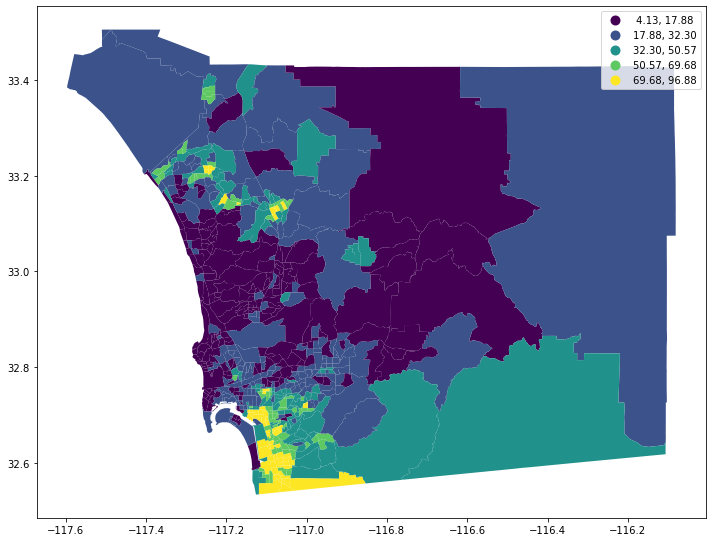

In [60]:
Race.plot(figsize=(12,10),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

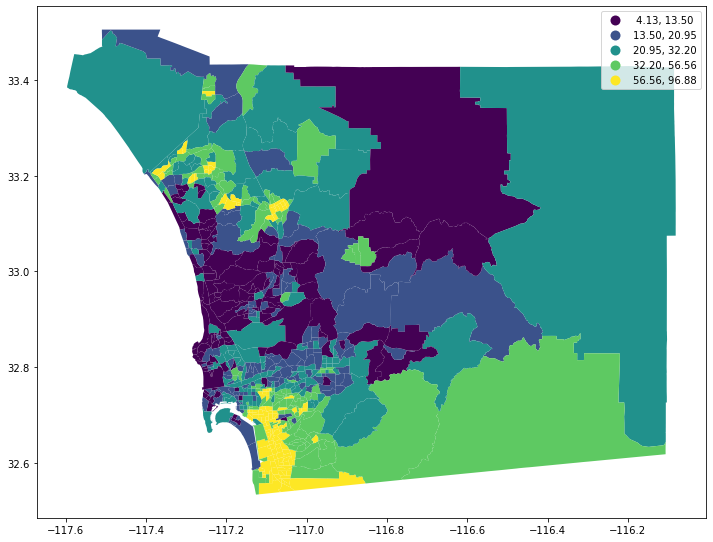

In [61]:
Race.plot(figsize=(12,10),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='Quantiles')

<AxesSubplot:>

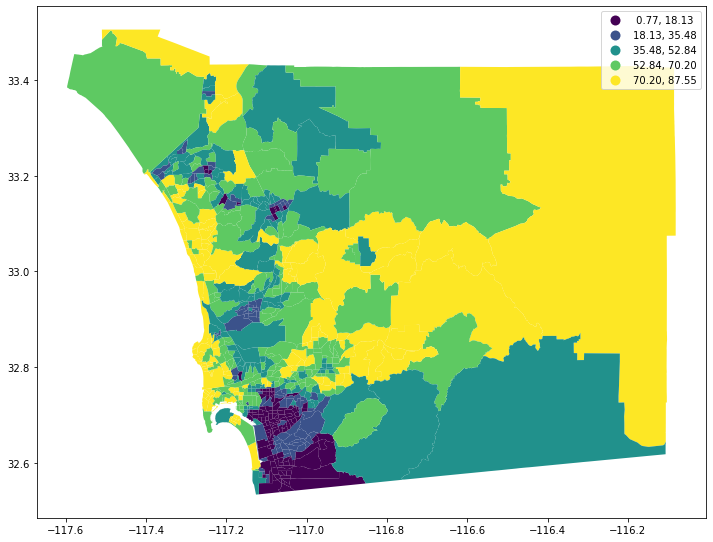

In [62]:
Race.plot(figsize=(12,10),
                 column='Percent White',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot:>

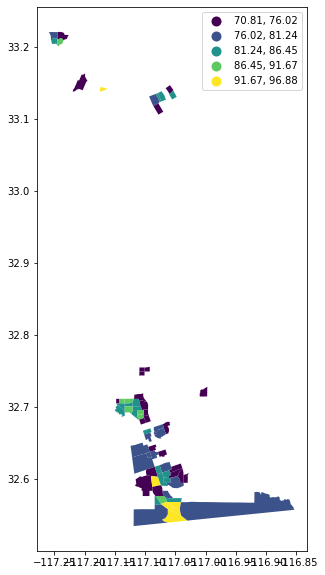

In [63]:
Race[Race['Percent Hispanic'] > 70].plot(figsize=(12,10),column='Percent Hispanic',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot:>

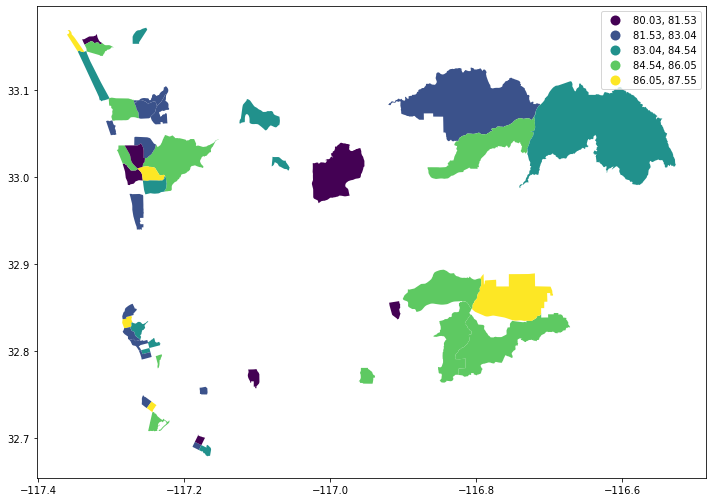

In [64]:
Race[Race['Percent White'] > 80].plot(figsize=(12,10),column='Percent White',
                 legend=True, 
                 scheme='equal_interval')

In [65]:
Race_web_mercator = Race.to_crs(epsg=3857)

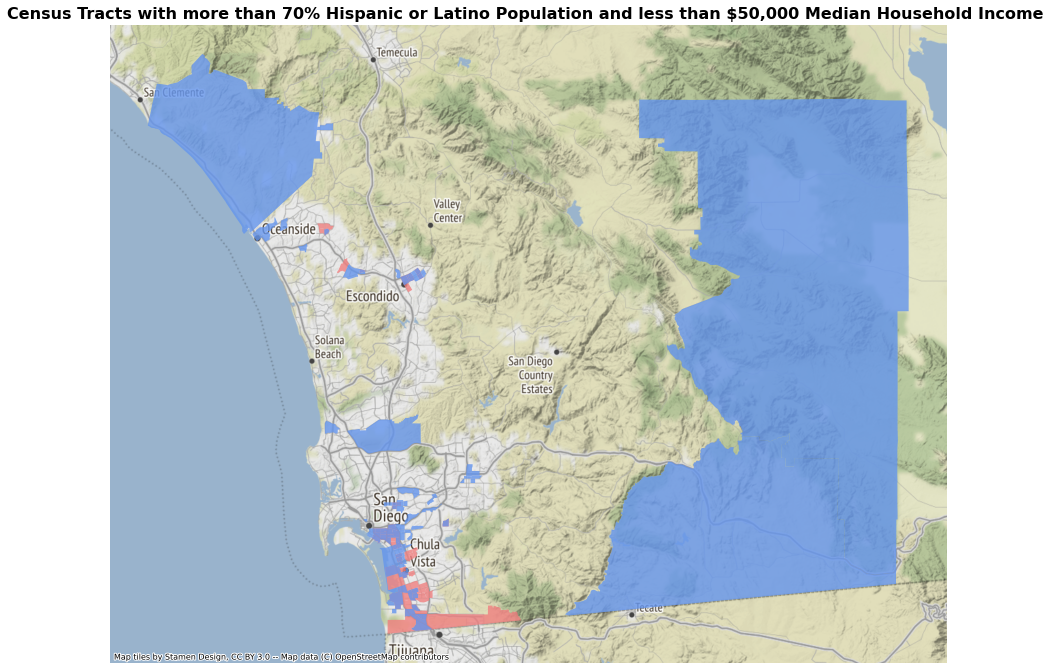

In [66]:
fig, ax = plt.subplots(figsize=(15, 15))

Race_web_mercator[Race_web_mercator['Percent Hispanic'] > 70].plot(ax=ax, alpha=0.8, color='lightcoral')
Income_web_mercator[Income_web_mercator['Median Income'] < 50000].plot(ax=ax, alpha=0.8, color='cornflowerblue')

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 70% Hispanic or Latino Population and less than $50,000 Median Household Income ',fontsize=16, weight='bold')

# add a basemap
ctx.add_basemap(ax)

**This map indicates population ofo more than 70% hispanic that have a household median income of less than $50,000. This map can be a lot better. There are a few thinbgs that limit this data visualization. for instance, how many people in the household? This woul dgive us a more accurate representation of low income communities.**

**Lastly, Group Responsibilities:**

**Stephanie Andrade**

**For the analysis of Flood Hazards in San Diego County I organized and ran code for Census Reporter Data. This included the outputs of the histograms and map with overlaying race and median income data. I also began and ran the JupyterHub Notebook for our midterm as well as the google doc that would be transferred over to the group github project. I needed to split our Jupyter notebook so Kelly and I will have 2 different notebooks. One includes Census data and the other includes Flood data.**

## Week 7 Additional Code

**Included in this lab is a Function. This helps us run data faster and allows us to see multiple maps using fewer codes.**

**Below there is a brief analysis of distribution of multiple race groups in our dataset. It is interesting to see the distribution of each population and the distinction between white areas vs nonwhite.**

In [67]:
def race_data(column_name, scheme):
    Race.plot(figsize=(12,10),
                 column=column_name,
                 legend=True, 
                 scheme=scheme)
    plt.title(column_name)

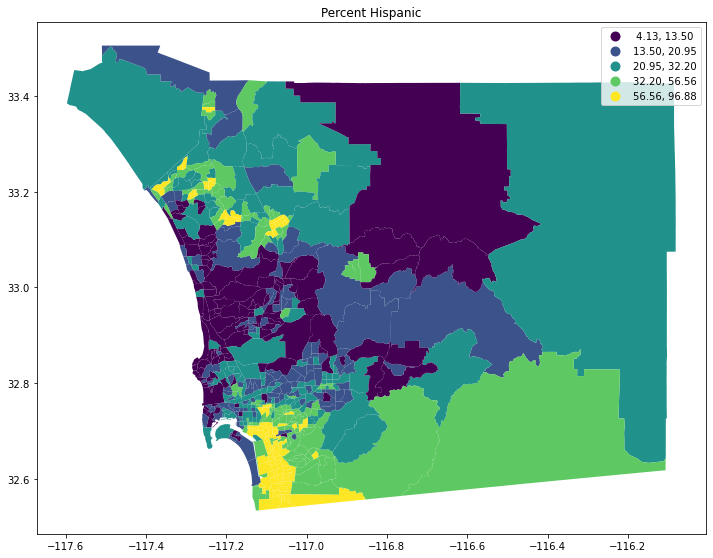

In [68]:
race_data(column_name='Percent Hispanic', scheme='Quantiles')

In [69]:
loop_columns = ['Percent Non Hispanic or Latino',
 'Percent Hispanic',
 'Percent White',
 'Percent Black',
 'Percent American Indian and Alaska Native',
 'Percent Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races']

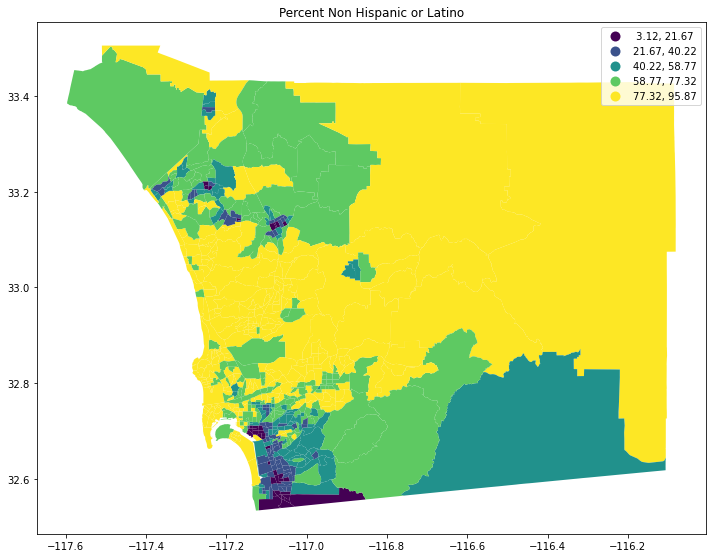

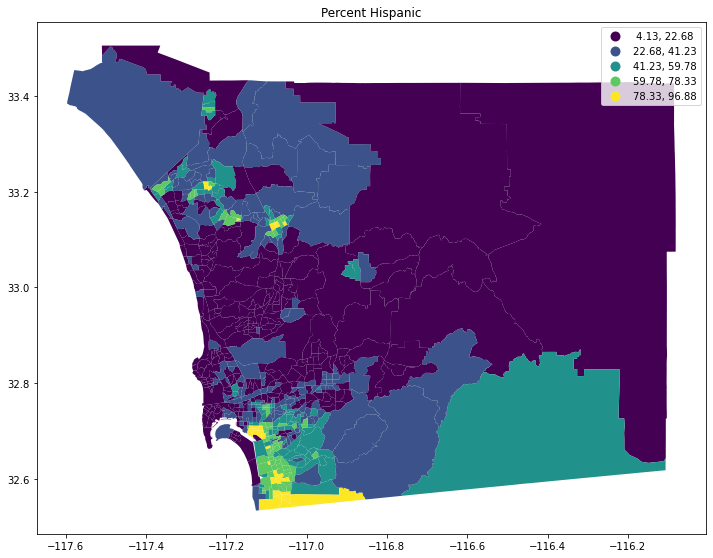

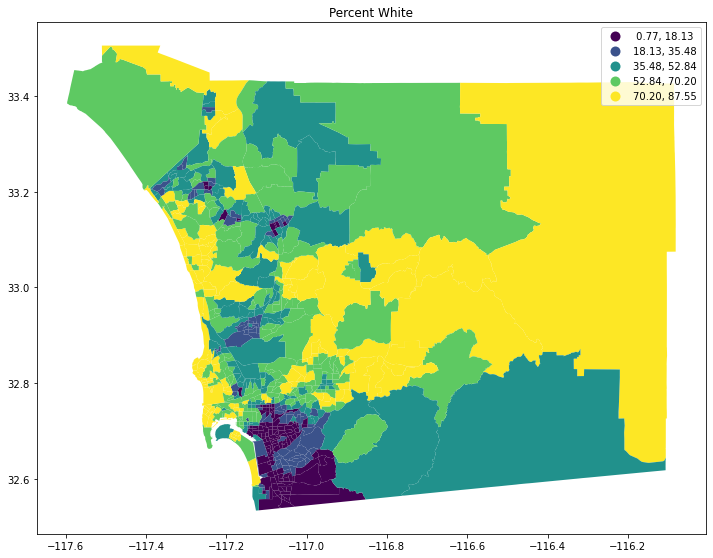

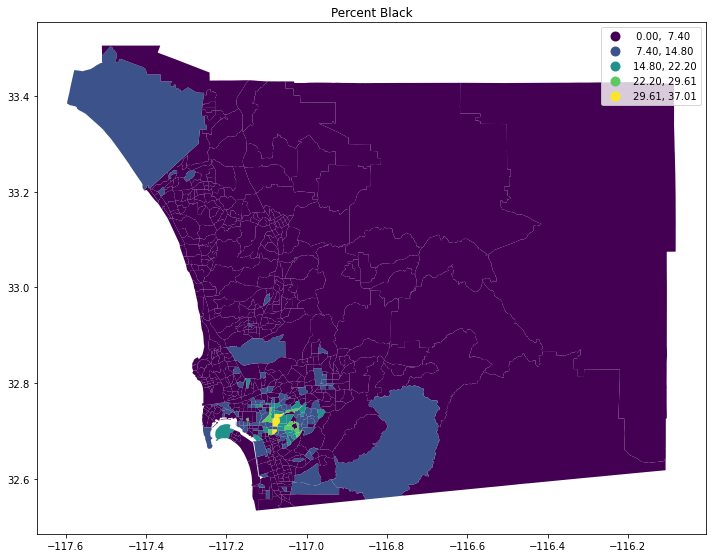

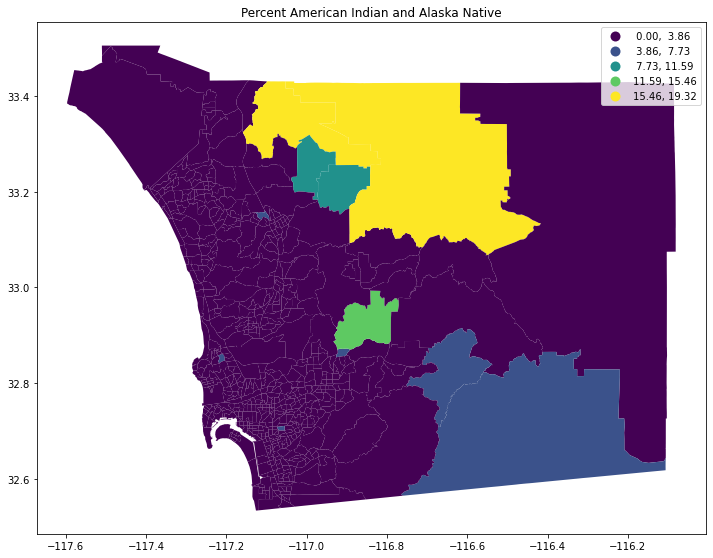

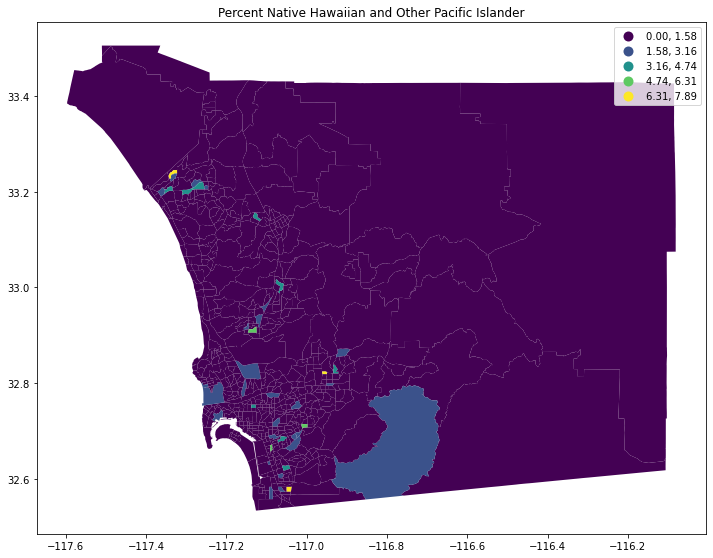

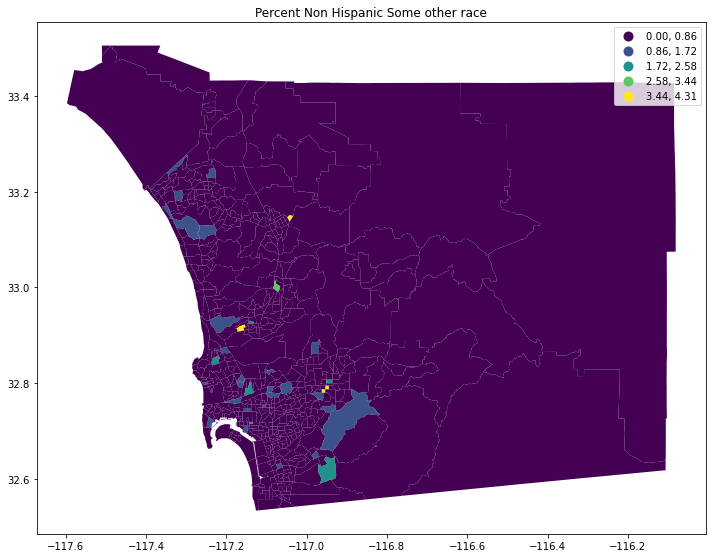

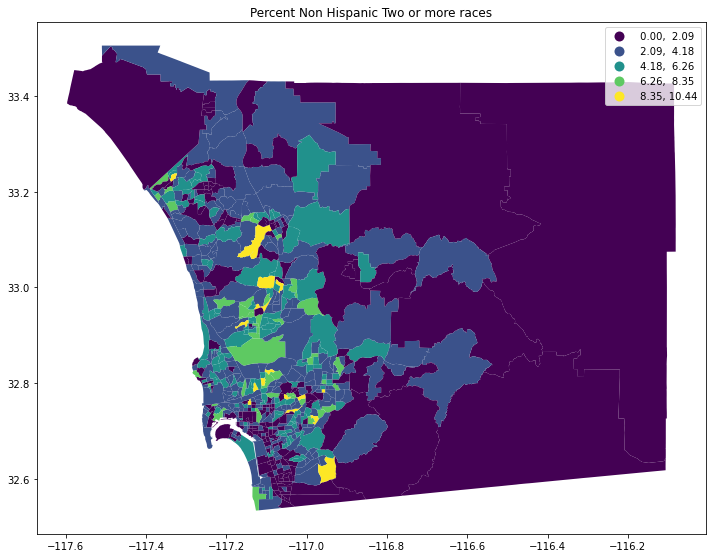

In [70]:
for column in loop_columns:
    race_data(column, scheme = 'equal_interval')

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


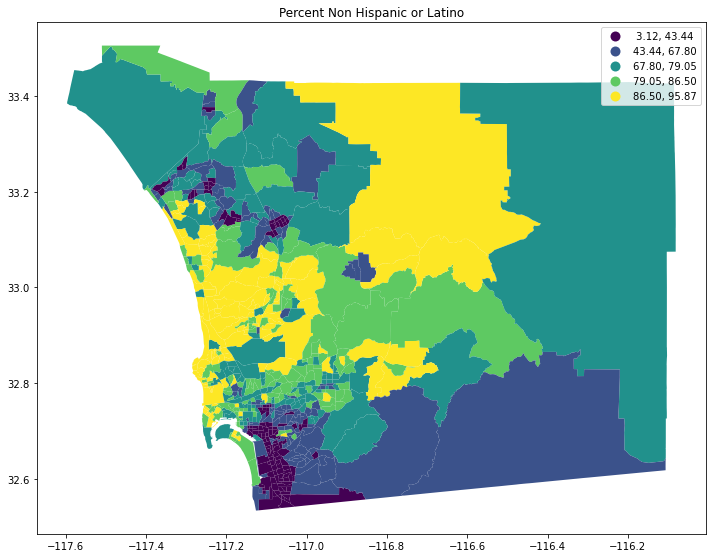

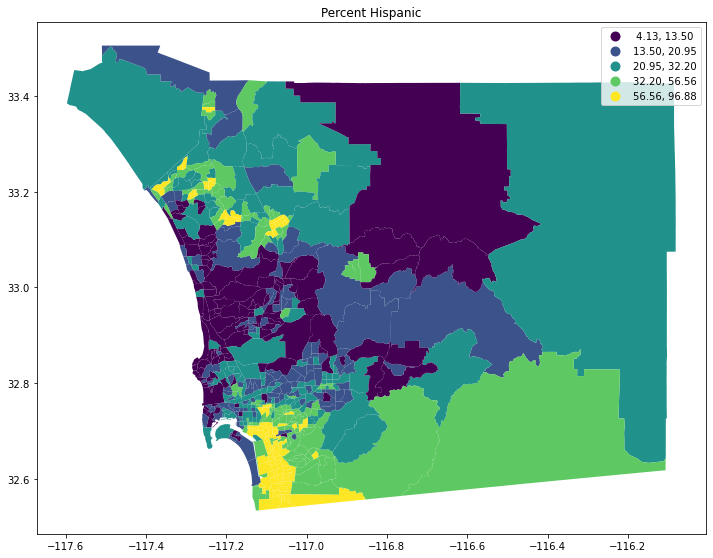

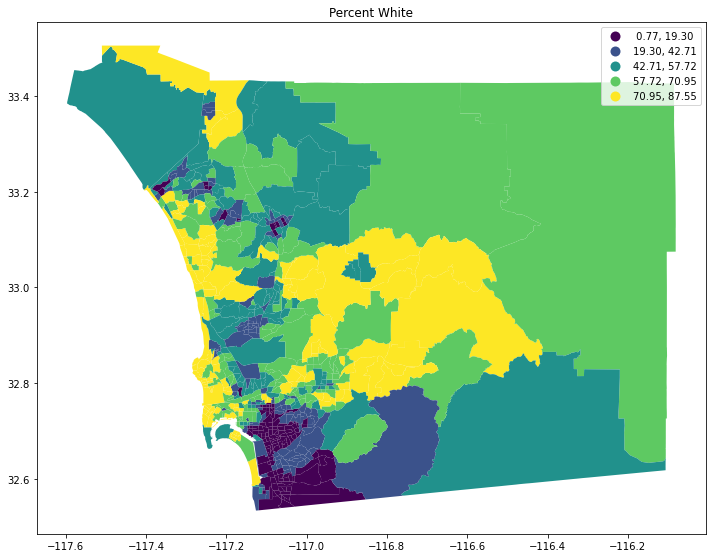

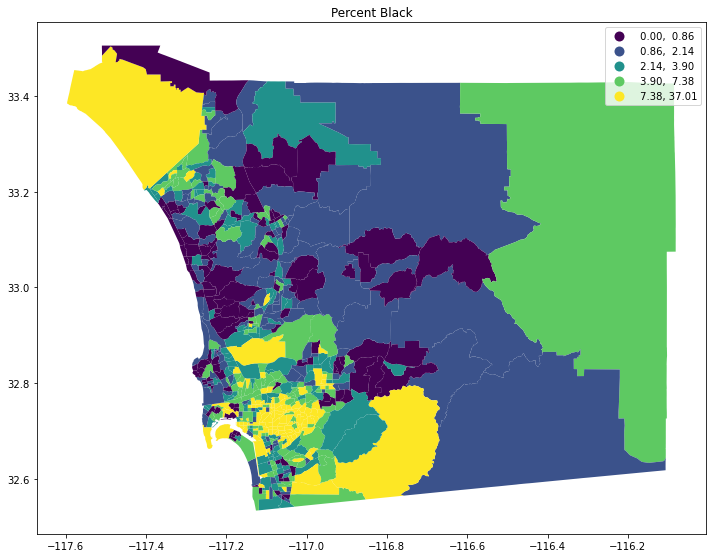

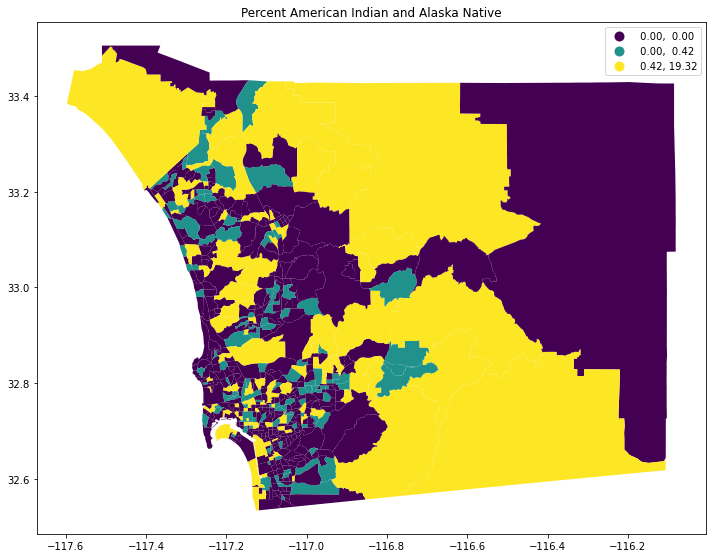

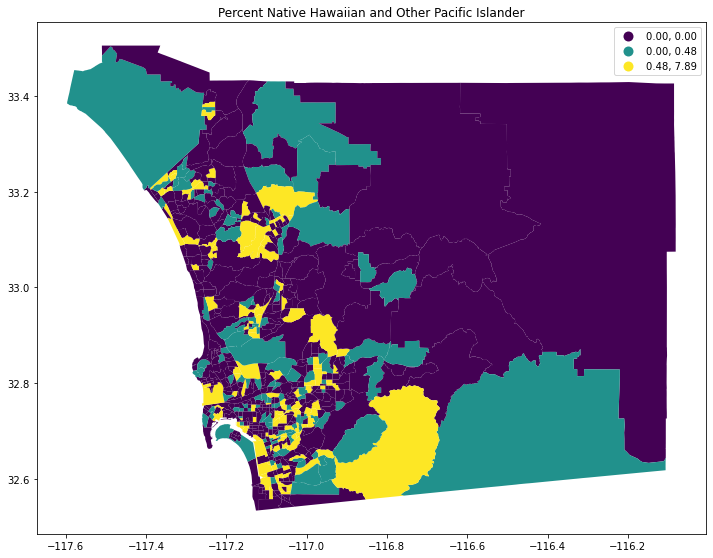

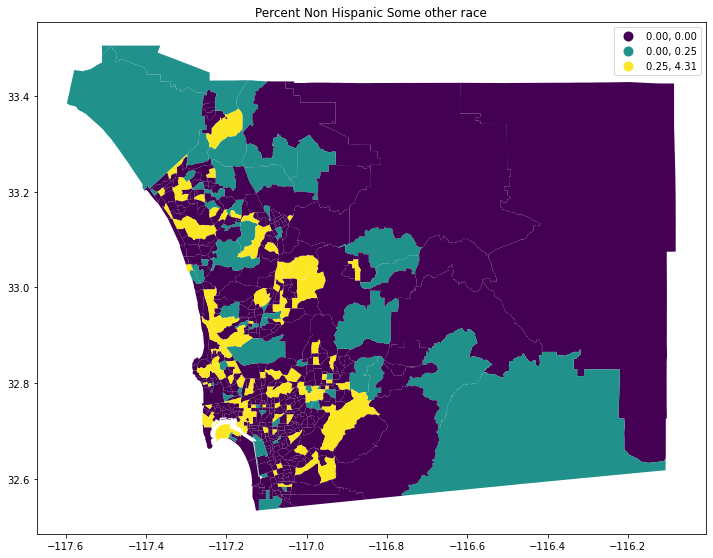

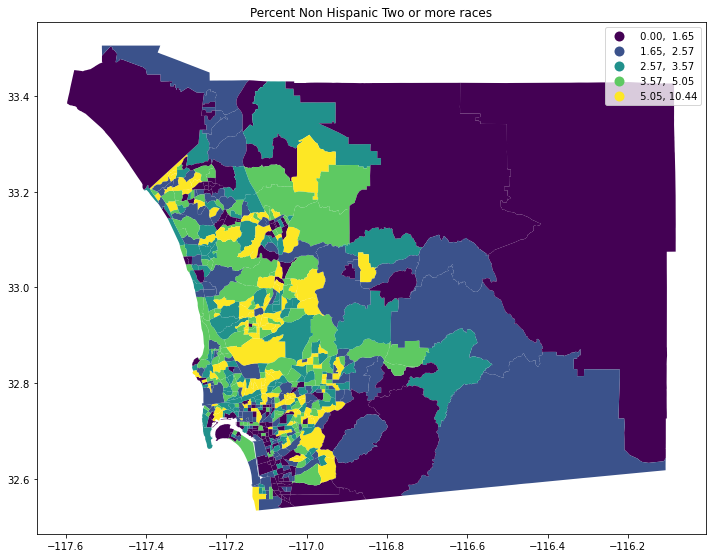

In [71]:
for column in loop_columns:
    race_data(column, scheme = 'quantiles')

## Drain Conveyance

**I wanted to give our Drain COnveyance data another shot. I went ahead and cleaned the data.**

In [72]:
Drain = gpd.read_file('data/Drain_Conveyance.zip')

In [73]:
import os
print(os.getcwd())

/home/jovyan/Group-Project/Midterm


In [74]:
Drain.shape

(48463, 36)

In [75]:
Drain.columns.tolist()

['OBJECTID',
 'DRAIN',
 'GISID',
 'EQPID',
 'SAPID',
 'FNODE_',
 'TNODE_',
 'CODE',
 'DIAMETER',
 'WIDTH',
 'HEIGHT',
 'ACT_LENGTH',
 'MATERIAL',
 'CONV_SHP',
 'FROM_ELEV',
 'TO_ELEV',
 'LINED',
 'SLOPE',
 'ERA',
 'EASEMENT',
 'INSTALL_YE',
 'ASBUILT_DA',
 'DRAWING_NO',
 'EASEMENT_D',
 'SUBDIVISIO',
 'WORK_ORDER',
 'STATUS',
 'COMMENTS',
 'OWNER',
 'MAINT',
 'ROUGHNESS',
 'NAME',
 'LOC_DESC',
 'WATERSHED',
 'SHAPE_Leng',
 'geometry']

**The dataset shows the uneven number of data in each row. I went ahead an reduced the dataset to only rows with significant amounts of data.**

In [76]:
Drain.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48463 entries, 0 to 48462
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    48463 non-null  int64   
 1   DRAIN       48463 non-null  int64   
 2   GISID       48462 non-null  object  
 3   EQPID       48462 non-null  object  
 4   SAPID       48463 non-null  object  
 5   FNODE_      48463 non-null  int64   
 6   TNODE_      48463 non-null  int64   
 7   CODE        48462 non-null  object  
 8   DIAMETER    48463 non-null  float64 
 9   WIDTH       48463 non-null  float64 
 10  HEIGHT      48463 non-null  float64 
 11  ACT_LENGTH  48463 non-null  float64 
 12  MATERIAL    48462 non-null  object  
 13  CONV_SHP    48462 non-null  object  
 14  FROM_ELEV   48463 non-null  float64 
 15  TO_ELEV     48463 non-null  float64 
 16  LINED       47159 non-null  object  
 17  SLOPE       48463 non-null  float64 
 18  ERA         2310 non-null   object  
 

In [77]:
Drain.sample()

OBJECTID  DRAIN     GISID     EQPID      SAPID  FNODE_  TNODE_ CODE  \
29994     29996  42094  DC042094  88031988  SS-015584   10909   10924    D   

       DIAMETER  WIDTH  ...  STATUS  COMMENTS OWNER MAINT  ROUGHNESS  NAME  \
29994      18.0    0.0  ...       A      None     S     6        0.0  None   

                              LOC_DESC  WATERSHED  SHAPE_Leng  \
29994  FROM INLET TO CLEANOUT VIA PIPE          2  102.354952   

                                                geometry  
29994  LINESTRING (6257656.533 1896218.293, 6257711.9...  

[1 rows x 36 columns]

In [78]:
columns_to_keep=['OBJECTID',
     'DRAIN',
     'GISID',
     'EQPID',
     'SAPID',
     'FNODE_',
     'TNODE_',
     'CODE',
     'DIAMETER',
     'WIDTH',
     'HEIGHT',
     'ACT_LENGTH',
     'MATERIAL',
     'CONV_SHP',
     'FROM_ELEV',
     'TO_ELEV',
     'LINED',
     'SLOPE',
     'INSTALL_YE',
     'DRAWING_NO',
     'STATUS',
     'OWNER',
     'MAINT',
     'ROUGHNESS',
     'LOC_DESC',
     'WATERSHED',
     'SHAPE_Leng',
     'geometry']

In [79]:
Drain=Drain[columns_to_keep]

In [80]:
Drain.sample(5)

OBJECTID  DRAIN     GISID     EQPID      SAPID  FNODE_  TNODE_ CODE  \
9373       9374  13414  DC013414  88013423  SS-018399   15218   15217    D   
19943     19944  17334  DC017334  88011768  SS-014435   19689   19720    D   
34673     34675   8164  DC008164  88009268  SS-005299    9207    9206    D   
30547     30549  47593  DC047593  88027410  SS-002554   14710   14724    D   
45565     45568  56015  DC056015  88045346  SS-015209   54935   54937    D   

       DIAMETER  WIDTH  ...  INSTALL_YE  DRAWING_NO STATUS OWNER  MAINT  \
9373        0.0    0.0  ...  1958-09-10      5176-D      A     S      6   
19943      24.0    0.0  ...        None     14506-L      A     S      6   
34673      24.0    0.0  ...        None   15529-9-D      A     S      6   
30547      24.0    0.0  ...        None  15035-16-D      A     S      6   
45565      18.0    0.0  ...  2004-05-20   29642-2-D      A     P      P   

       ROUGHNESS                         LOC_DESC  WATERSHED  SHAPE_Leng  \
9373         0.0  FROM INLET TO CLEANOUT VIA PIPE          2   21.615688   
19943        0.0     FROM INLET TO INLET VIA PIPE          4   74.091805   
34673        0.0     FROM INLET TO INLET VIA PIPE          2   35.608075   
30547        0.0     FROM INLET TO INLET VIA PIPE          4   43.693611   
45565        0.0         PIPE: F/O 849 KETTNER RD          3  114.465575   

                                                geometry  
9373   LINESTRING (6246737.714 1880064.971, 6246746.4...  
19943  LINESTRING (6324368.714 1869514.291, 6324363.9...  
34673  LINESTRING (6287646.337 1905733.687, 6287610.7...  
30547  LINESTRING (6295946.388 1881686.098, 6295938.9...  
45565  LINESTRING (6278939.727 1839295.876, 6278943.6...  

[5 rows x 28 columns]

In [81]:
list(Drain)

['OBJECTID',
 'DRAIN',
 'GISID',
 'EQPID',
 'SAPID',
 'FNODE_',
 'TNODE_',
 'CODE',
 'DIAMETER',
 'WIDTH',
 'HEIGHT',
 'ACT_LENGTH',
 'MATERIAL',
 'CONV_SHP',
 'FROM_ELEV',
 'TO_ELEV',
 'LINED',
 'SLOPE',
 'INSTALL_YE',
 'DRAWING_NO',
 'STATUS',
 'OWNER',
 'MAINT',
 'ROUGHNESS',
 'LOC_DESC',
 'WATERSHED',
 'SHAPE_Leng',
 'geometry']

In [82]:
Drain.columns = ['Object ID',
                'Drain ID',
                'GIS ID',
                'Equipment ID',
                'SAP ID',
                'Drain Structure ID - Upstream',
                'Drain Structure ID - Downstream',
                'Conveyance Type',
                'Diameter Pipe',
                'Width',
                'Height',
                'Length',
                'Type of Material',
                'Conveyance Cross Sectional Shape',
                'Elevation - Upstream',
                'Elevation - Downstream',
                'Lined',
                'Slope',
                'Installation Date',
                'Drawing Number',
                'Status',
                'Owner',
                'Maintainance',
                'Roughness',
                'Location Description',
                'Watershed',
                'Shape_Length',
                'geometry']

In [83]:
Drain.sample(5)

Object ID  Drain ID    GIS ID Equipment ID     SAP ID  \
41773      41776     52211  DC052211     88044880  SS-002729   
11517      11518     13623  DC013623     88015505  SS-009472   
4314        4315     22517  DC022517     88021883  SS-001298   
13779      13780     15229  DC015229     88010577  SS-025305   
9132        9133     39962  DC039962     88025804  SS-030602   

       Drain Structure ID - Upstream  Drain Structure ID - Downstream  \
41773                          50437                            50438   
11517                          15461                            15452   
4314                           25653                            25746   
13779                          17100                            17297   
9132                           45172                            45174   

      Conveyance Type  Diameter Pipe  Width  ...  Installation Date  \
41773               D           12.0    0.0  ...         2000-06-09   
11517               D           18.0    0.0  ...               None   
4314                D           24.0    0.0  ...         1956-12-13   
13779               D           30.0    0.0  ...               None   
9132                D           24.0    0.0  ...         2004-03-02   

       Drawing Number Status Owner  Maintainance  Roughness  \
41773       30168-3-D      A     P             P        0.0   
11517       11704-6-D      A     S             6        0.0   
4314           4199-D      A     S             6        0.0   
13779       11793-4-D      A     S             6        0.0   
9132       28056-10-D      A     P             P        0.0   

                    Location Description  Watershed Shape_Length  \
41773  PIPE:NW O 8620-NW O 8606  MIRAMAR          2   210.221101   
11517       FROM INLET TO INLET VIA PIPE          2    37.676310   
4314      FROM INLET TO CONNECT VIA PIPE          3   104.302023   
13779         FROM LUG TO INLET VIA PIPE          2   328.204223   
9132          FROM CLEAN TO LUG VIA PIPE          2   322.893296   

                                                geometry  
41773  LINESTRING (6288822.068 1906256.436, 6288822.2...  
11517  LINESTRING (6264651.756 1879365.618, 6264673.8...  
4314   LINESTRING (6306634.718 1855325.646, 6306632.3...  
13779  LINESTRING (6266084.176 1875757.439, 6266071.9...  
9132   LINESTRING (6268671.061 1916739.274, 6268603.7...  

[5 rows x 28 columns]

In [84]:
Drain['Watershed'].value_counts()

2    21900
3    12318
4     7669
5     4122
6     2453
0        1
Name: Watershed, dtype: int64

In [85]:
watershed_count = Drain['Watershed'].value_counts()
watershed_count

2    21900
3    12318
4     7669
5     4122
6     2453
0        1
Name: Watershed, dtype: int64

In [86]:
watershed_count = watershed_count.reset_index()
watershed_count

index  Watershed
0      2      21900
1      3      12318
2      4       7669
3      5       4122
4      6       2453
5      0          1

In [87]:
watershed_count.columns = ['Watershed', 'Stormdrain to Watershed']

In [88]:
watershed_count

Watershed  Stormdrain to Watershed
0          2                    21900
1          3                    12318
2          4                     7669
3          5                     4122
4          6                     2453
5          0                        1

<AxesSubplot:title={'center':'Number of Stormdrains To Watersheds'}, xlabel='Watershed'>

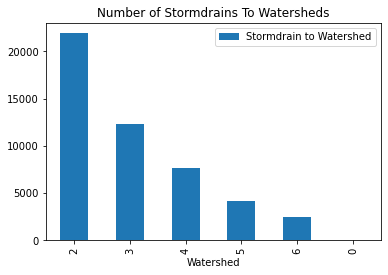

In [89]:
watershed_count.plot.bar(x = 'Watershed', y = 'Stormdrain to Watershed', title ='Number of Stormdrains To Watersheds')

In [90]:
Desired_columns = ['Drain ID', 'Status', 'Conveyance Type', 'Diameter Pipe', 'Slope', 'Type of Material', 'Watershed', 'Shape_Length', 'geometry']
Drain[Desired_columns]

Drain ID Status Conveyance Type  Diameter Pipe  Slope Type of Material  \
0         47982      A               X            0.0    0.0               RC   
1         43647      A               D           12.0    0.0              RCP   
2         47983      A               D           12.0    0.0              RCP   
3         47984      A               D            8.0    0.0              CMP   
4         47985      A               D            8.0    0.0              CMP   
...         ...    ...             ...            ...    ...              ...   
48458     58126      A               X           72.0    0.0             CONC   
48459     58127      A               X           60.0    0.0             CONC   
48460     58128      A               X           60.0    0.0             CONC   
48461     58129      A               X           60.0    0.0             CONC   
48462         0   None            None            0.0    0.0             None   

       Watershed  Shape_Length  \
0              2     56.419546   
1              4     37.206045   
2              4     36.858819   
3              3     48.349789   
4              3     48.034176   
...          ...           ...   
48458          6    292.318166   
48459          6    100.593157   
48460          6     94.149182   
48461          6    101.787940   
48462          0      0.000000   

                                                geometry  
0      LINESTRING (6295577.489 1910525.813, 6295572.1...  
1      LINESTRING (6267767.764 1855281.133, 6267775.4...  
2      LINESTRING (6267767.764 1855281.133, 6267766.6...  
3      LINESTRING (6293886.072 1853481.927, 6293889.3...  
4      LINESTRING (6293886.072 1853481.927, 6293884.9...  
...                                                  ...  
48458  LINESTRING (6312232.067 1785215.668, 6312229.5...  
48459  LINESTRING (6312606.692 1786162.249, 6312597.4...  
48460  LINESTRING (6312606.692 1786162.249, 6312606.7...  
48461  LINESTRING (6312606.692 1786162.249, 6312610.4...  
48462                                               None  

[48463 rows x 9 columns]

In [91]:
Drain_trimmed = Drain[Desired_columns].copy()
Drain_trimmed

Drain ID Status Conveyance Type  Diameter Pipe  Slope Type of Material  \
0         47982      A               X            0.0    0.0               RC   
1         43647      A               D           12.0    0.0              RCP   
2         47983      A               D           12.0    0.0              RCP   
3         47984      A               D            8.0    0.0              CMP   
4         47985      A               D            8.0    0.0              CMP   
...         ...    ...             ...            ...    ...              ...   
48458     58126      A               X           72.0    0.0             CONC   
48459     58127      A               X           60.0    0.0             CONC   
48460     58128      A               X           60.0    0.0             CONC   
48461     58129      A               X           60.0    0.0             CONC   
48462         0   None            None            0.0    0.0             None   

       Watershed  Shape_Length  \
0              2     56.419546   
1              4     37.206045   
2              4     36.858819   
3              3     48.349789   
4              3     48.034176   
...          ...           ...   
48458          6    292.318166   
48459          6    100.593157   
48460          6     94.149182   
48461          6    101.787940   
48462          0      0.000000   

                                                geometry  
0      LINESTRING (6295577.489 1910525.813, 6295572.1...  
1      LINESTRING (6267767.764 1855281.133, 6267775.4...  
2      LINESTRING (6267767.764 1855281.133, 6267766.6...  
3      LINESTRING (6293886.072 1853481.927, 6293889.3...  
4      LINESTRING (6293886.072 1853481.927, 6293884.9...  
...                                                  ...  
48458  LINESTRING (6312232.067 1785215.668, 6312229.5...  
48459  LINESTRING (6312606.692 1786162.249, 6312597.4...  
48460  LINESTRING (6312606.692 1786162.249, 6312606.7...  
48461  LINESTRING (6312606.692 1786162.249, 6312610.4...  
48462                                               None  

[48463 rows x 9 columns]

In [92]:
Drain_web_mercator = Drain.to_crs(epsg=3857)

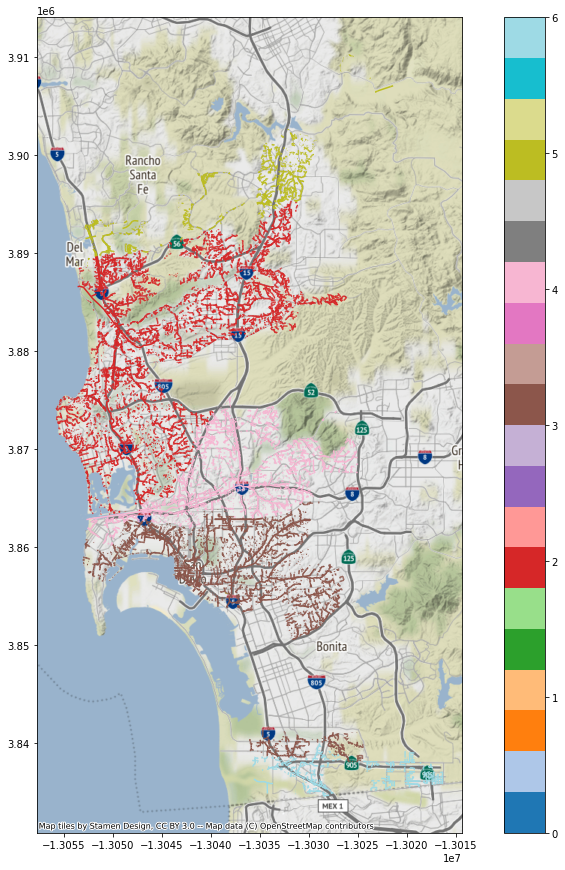

In [93]:
ax = Drain_web_mercator.plot(figsize=(15,15),
                            column='Watershed',
                            cmap='tab20',
                            legend=True)


ctx.add_basemap(ax)

**I was able to clean our Drain Conveyance Data and create a new map that distributed Drains based on the Watershed they led to. This map can also be recreated to analyze drain pipe size.**

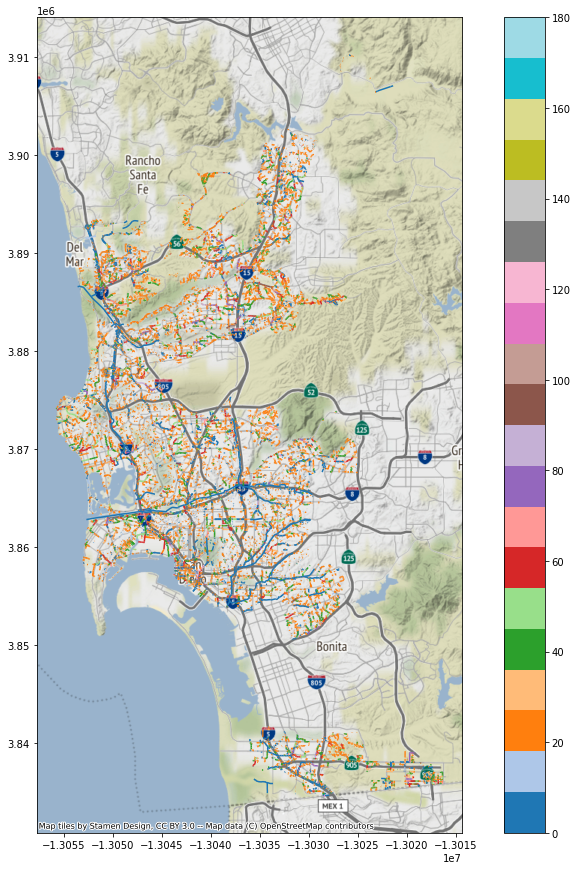

In [94]:
ax = Drain_web_mercator.plot(figsize=(15,15),
                            column='Diameter Pipe',
                            cmap='tab20',
                            legend=True
                            )


ctx.add_basemap(ax)

**This is just a start to improving our data and connecting our census and drain data.**

**Our goal is to combine these datasets and incorporate the movement of people through decades based on flood hazardous or costly insurance.**